In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
yf.pdr_override()

In [2]:
tickers = ['APN.JO','FSR.JO', 'IMP.JO','NTC.JO', 'RBP.JO', 'SSW.JO']

securities = ['Aspen','FirstRand', 'Impala Platinum', 'NetCare', 'Royal Bafokeng', 'Sibanye StillWater']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, start = '2007-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec_data.tail()

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2023-01-16 00:00:00+02:00,14653.0,6484.0,22607.0,1521.0,16770.0,5060.0
2023-01-17 00:00:00+02:00,14970.0,6439.0,22136.0,1518.0,16657.0,4969.0
2023-01-18 00:00:00+02:00,14746.0,6449.0,22234.0,1520.0,16637.0,5009.0
2023-01-19 00:00:00+02:00,14715.0,6436.0,21580.0,1515.0,16650.0,4855.0
2023-01-20 00:00:00+02:00,14547.0,6405.0,21430.0,1482.0,16559.0,4853.0


In [4]:
sec_returns = np.log(sec_data/sec_data.shift(1))

In [5]:
sec_returns

,APN.JO,FSR.JO,IMP.JO,NTC.JO,RBP.JO,SSW.JO
Date,,,,,,
2007-01-02 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03 00:00:00+02:00,-0.004612,-0.021869,-0.043909,-0.041658,NaN,NaN
2007-01-04 00:00:00+02:00,-0.014902,-0.026133,-0.051293,-0.022642,NaN,NaN
2007-01-05 00:00:00+02:00,0.000625,0.030729,-0.012497,-0.007663,NaN,NaN
2007-01-08 00:00:00+02:00,0.000312,0.018174,0.035240,0.022815,NaN,NaN
...,...,...,...,...,...,...
2023-01-16 00:00:00+02:00,0.024386,-0.005077,-0.037634,0.001974,-0.013622,-0.021119
2023-01-17 00:00:00+02:00,0.021403,-0.006964,-0.021054,-0.001974,-0.006761,-0.018148
2023-01-18 00:00:00+02:00,-0.015076,0.001552,0.004417,0.001317,-0.001201,0.008018


In [6]:
print("The Average Security Returns of:")
for i in range(len(tickers)):
    ticker = tickers[i]
    sec_returns[ticker].mean()*250
    sec_returns[ticker].std()*250**0.5
    print(" "+tickers[i]+" is ",str(round(sec_returns[ticker].std()*250,2))+'%')

The Average Security Returns of:
 APN.JO is  5.42%
 FSR.JO is  5.13%
 IMP.JO is  8.03%
 NTC.JO is  4.58%
 RBP.JO is  7.3%
 SSW.JO is  9.97%


In [7]:
print("The Variance of:")    
for k in range(len(securities)):
    ticker = tickers[k]
    Sec_var = sec_returns[ticker].var()*250
    print("    "+securities[k]+" Security Returns is ",str(round(Sec_var,2))+'%')
    

The Variance of:
    Aspen Security Returns is  0.12%
    FirstRand Security Returns is  0.11%
    Impala Platinum Security Returns is  0.26%
    NetCare Security Returns is  0.08%
    Royal Bafokeng Security Returns is  0.21%
    Sibanye StillWater Security Returns is  0.4%


In [8]:
#Returns for all securities
sec_returns[['APN.JO','FSR.JO','IMP.JO','NTC.JO','RBP.JO','SSW.JO']].mean()*250
sec_returns[['APN.JO','FSR.JO','IMP.JO','NTC.JO','RBP.JO','SSW.JO']].std()*250**0.5

APN.JO    0.342920
FSR.JO    0.324273
IMP.JO    0.507830
NTC.JO    0.289963
RBP.JO    0.461902
SSW.JO    0.630281
dtype: float64

<AxesSubplot:>

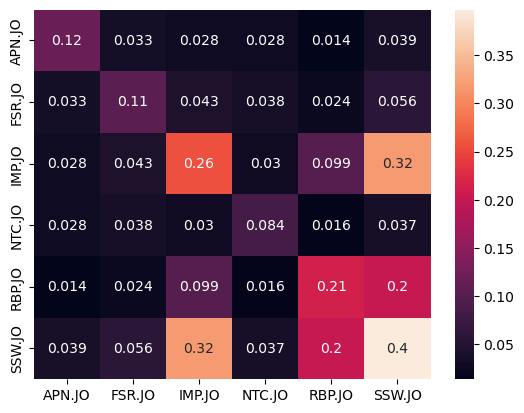

In [9]:
#Covariance Matrix
cov_matrix_a = sns.heatmap(sec_returns.cov()*250, annot=True)
cov_matrix_a

<AxesSubplot:>

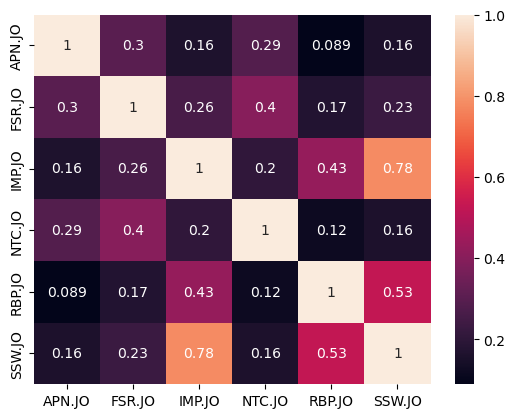

In [10]:
corr_matrix = sns.heatmap(sec_returns.corr(), annot=True)
corr_matrix

In [11]:
#Equal Weighting Scheme
weights = np.array([0.1321,0.0552,0.1376,0.0632,0.0895,0.1239])

In [12]:
#Portfolio Variance
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))
print(str(round(pfolio_var,2)*100)+ '%')

ValueError: shapes (6,6) and (8,) not aligned: 6 (dim 1) != 8 (dim 0)

In [ ]:
#Portfolio Votality
pfolio_vol = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))
print(str(round(pfolio_vol,2)*100)+ '%')